In [25]:
import pandas as pd
df = pd.read_csv('Flipkart_webscraped_data.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rating              553 non-null    int64 
 1   review_summary      553 non-null    object
 2   review_description  553 non-null    object
 3   product_id          553 non-null    object
 4   Price               553 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 21.7+ KB


In [27]:
# adding product id to existing dataframe
product_id = {
    'iPhone 12' : 'MGJ83HN/A',
    'vivo T3 Ultra' : 'V2426',
    'Google Pixel 8' : 'GPJ41',
    'IQOO Neo9 Pro' : 'I2304',
    'SAMSUNG Galaxy S23 5G' : 'SM-S911BZEBINS'
}

In [28]:
#Rename the column name
df.rename(columns={'product_id' : 'product_name'},inplace = True)

In [29]:
#added product_id
df['product_id'] = df['product_name'].map(product_id)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rating              553 non-null    int64 
 1   review_summary      553 non-null    object
 2   review_description  553 non-null    object
 3   product_name        553 non-null    object
 4   Price               553 non-null    int64 
 5   product_id          553 non-null    object
dtypes: int64(2), object(4)
memory usage: 26.1+ KB


In [31]:
df.duplicated().sum()

16

In [32]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [33]:
blank=[]
for i,j,k,l,m,n,o in df.itertuples():
  if type(j)==str:
    if j.isspace():
      blank.append(i)
df.loc[blank]


,rating,review_summary,review_description,product_name,Price,product_id


In [34]:
# finding str length below 10 count
Word_Length=[]
for i,j,k,l,m,n,o in df.itertuples():
  if type(j)==str:
    if len(j)<10:
      Word_Length.append(i)
df.loc[Word_Length]

,rating,review_summary,review_description,product_name,Price,product_id


In [35]:

# resting index after droping rows
df.reset_index(drop=True, inplace=True)

In [36]:

df.columns

Index(['rating', 'review_summary', 'review_description', 'product_name',
       'Price', 'product_id'],
      dtype='object')

In [37]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Example usage
text = "This product is amazing!"
sentiment = sia.polarity_scores(text)
print(sentiment)


{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6239}


In [39]:
# Add sentiment scores to the DataFrame
df['Sentiment_Score'] = df['review_description'].apply(lambda x: sia.polarity_scores (str(x)))

# Extract compound score from sentiment scores
df['compound'] = df['Sentiment_Score'].apply(lambda x: x['compound'])

# Classify sentiment based on the compound score
df['compound_sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Classify product rating
df['rating_sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')

# Drop the Sentiment_Score column as it's no longer needed
df = df.drop('Sentiment_Score', axis=1)

In [40]:
# Calculate accuracy of sentiment classification against rating
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['rating_sentiment'], df['compound_sentiment'])

print(f'Accuracy: {accuracy}')

Accuracy: 0.8733705772811918


In [47]:
# sentiment analysis using Textblob package

def get_polarity(text):
    try:   # Create a TextBlob object
        blob = TextBlob(str(text))  # Ensure text is treated as a string
        return blob.sentiment.polarity  # Get the polarity score (-1 to 1)
    except Exception as e:
        return None  # Handle potential errors and return None

# Assuming df is your DataFrame and 'Review' is the column with the text data
df['Polarity'] = df['review_description'].apply(get_polarity)  # First calculate the polarity
df['TextBlob_Sentiment'] = df['Polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Show the DataFrame with the polarity and sentiment columns
print(df)

     rating          review_summary  \
0         5        Perfect product!   
1         5                Terrific   
2         5                  Super!   
3         5          Classy product   
4         5       Terrific purchase   
..      ...                     ...   
532       4              Delightful   
533       4         Value-for-money   
534       4              Delightful   
535       1  Don't waste your money   
536       5               Just wow!   

                                    review_description           product_name  \
0    The brand is very trustworthy and i got genuin...              iPhone 12   
1    Wow superb camera phone.Very smooth speed and ...              iPhone 12   
2                                                 Nice              iPhone 12   
3                                              Awesome              iPhone 12   
4    Awesome phone … value for money.. Happy with b...              iPhone 12   
..                                           

In [48]:


# Save the DataFrame to a CSV file.
df.to_csv('sentiment_analysis_flipkart.csv', index=False)


In [49]:
df.head()

,rating,review_summary,review_description,product_name,Price,product_id,compound,compound_sentiment,rating_sentiment,Sentiment,Polarity,TextBlob_Sentiment
0,5,Perfect product!,The brand is very trustworthy and i got genuin...,iPhone 12,30999,MGJ83HN/A,0.7650,positive,positive,Positive,0.133333,positive
1,5,Terrific,Wow superb camera phone.Very smooth speed and ...,iPhone 12,30999,MGJ83HN/A,0.8481,positive,positive,Positive,0.587500,positive
2,5,Super!,Nice,iPhone 12,30999,MGJ83HN/A,0.4215,positive,positive,Positive,0.600000,positive
3,5,Classy product,Awesome,iPhone 12,30999,MGJ83HN/A,0.6249,positive,positive,Positive,1.000000,positive
4,5,Terrific purchase,Awesome phone … value for money.. Happy with b...,iPhone 12,30999,MGJ83HN/A,0.7906,positive,positive,Positive,0.646667,positive


## This grouped bar chart shows how users rated each product, helping you see which products receive consistently higher ratings. 

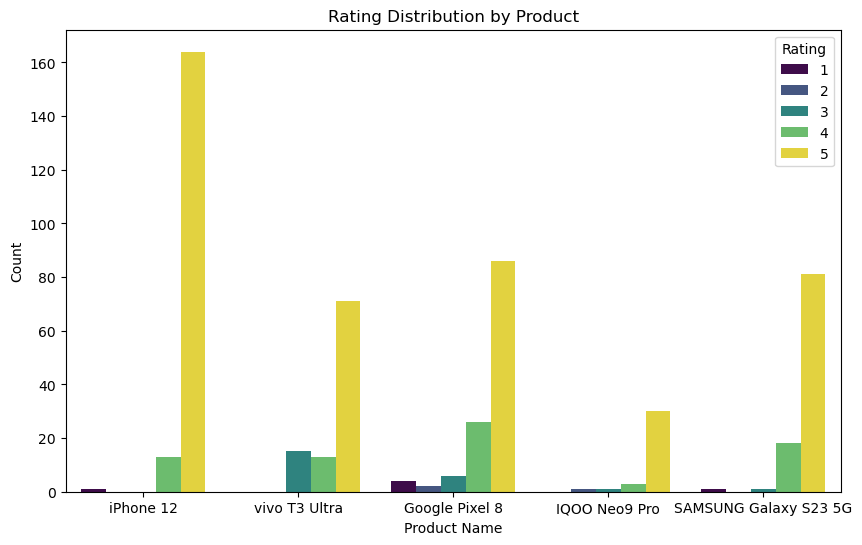

In [66]:
#analyze the data

import matplotlib.pyplot as plt

# 1. Rating Distribution by Product
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="product_name", hue="rating", palette="viridis")
plt.title("Rating Distribution by Product")
plt.xlabel("Product Name")
plt.ylabel("Count")
plt.legend(title="Rating")
plt.show()

## A bar chart of the average compound sentiment score for each product provides an overall sentiment trend.

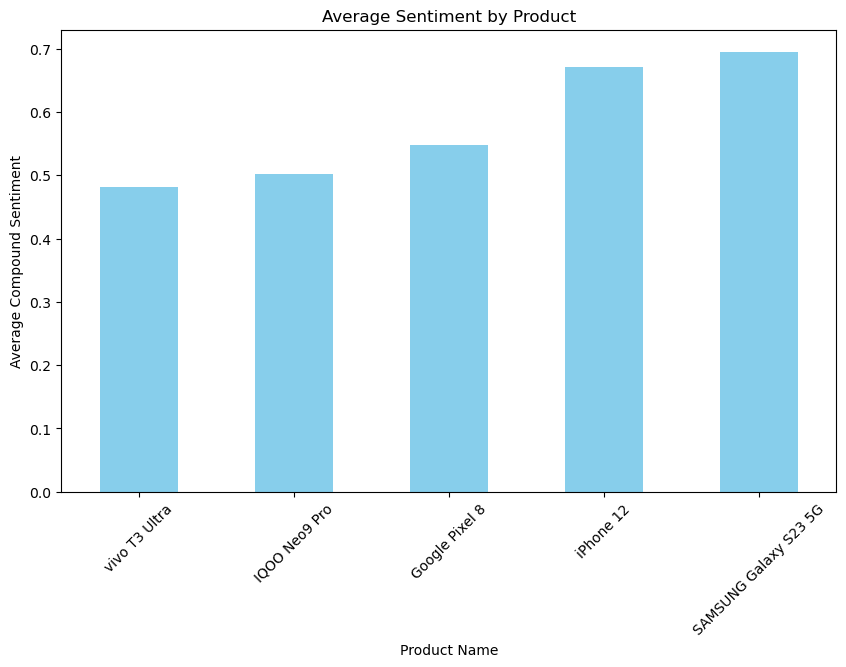

In [68]:
# 2. Average Sentiment per Product
avg_sentiment = df.groupby("product_name")["compound"].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_sentiment.plot(kind="bar", color="skyblue")
plt.title("Average Sentiment by Product")
plt.xlabel("Product Name")
plt.ylabel("Average Compound Sentiment")
plt.xticks(rotation=45)
plt.show()

## The scatter plot helps analyze the relationship between product pricing and customer sentiment, grouped by product.

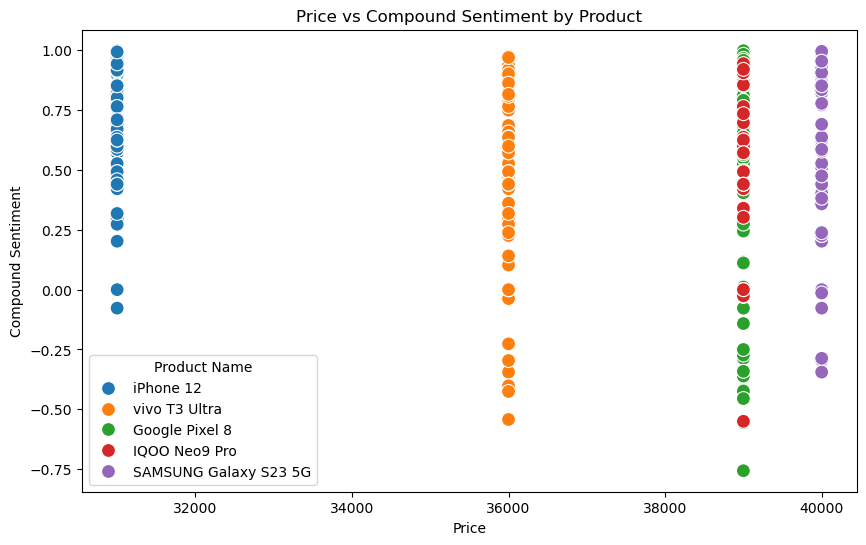

In [55]:
# 3. Price vs Sentiment (Grouped by Product)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Price", y="compound", hue="product_name", palette="tab10", s=100)
plt.title("Price vs Compound Sentiment by Product")
plt.xlabel("Price")
plt.ylabel("Compound Sentiment")
plt.legend(title="Product Name")
plt.show()

## A stacked bar chart gives a breakdown of positive, neutral, and negative sentiments for each product.

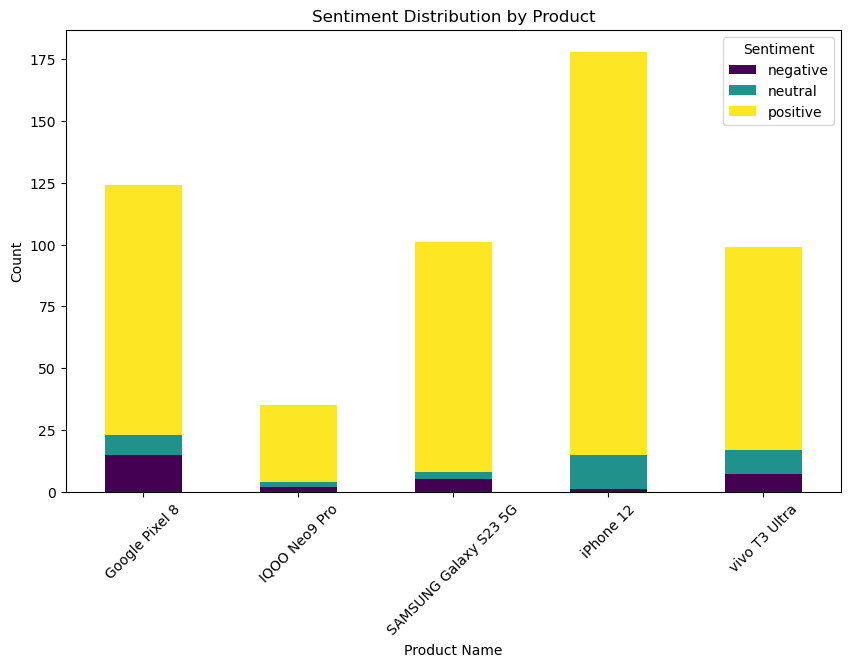

In [56]:
# 4. Sentiment Distribution by Product
sentiment_distribution = df.groupby(["product_name", "compound_sentiment"]).size().unstack(fill_value=0)
sentiment_distribution.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Sentiment Distribution by Product")
plt.xlabel("Product Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

In [59]:
from wordcloud import WordCloud

## A heatmap to observe the relationship between sentiment polarity and rating for each product.

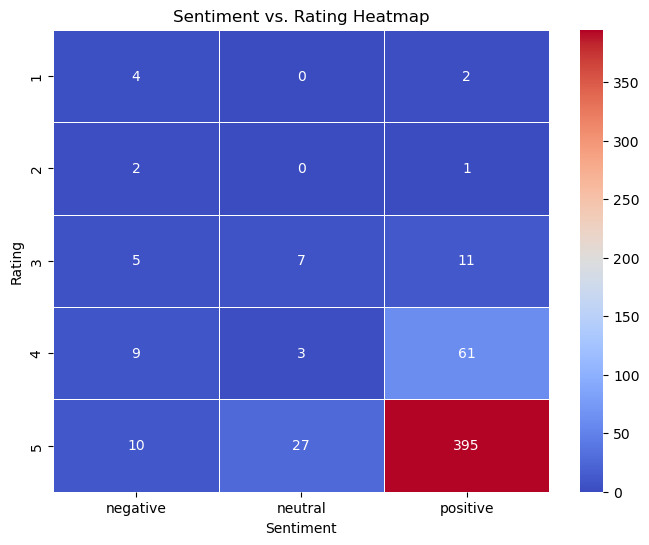

In [61]:
#Sentiment vs. Rating Heatmap
heatmap_data = pd.crosstab(df["rating"], df["compound_sentiment"])
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.title("Sentiment vs. Rating Heatmap")
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.show()

## Create word clouds for each product to visualize the most frequently used words in review_summary.

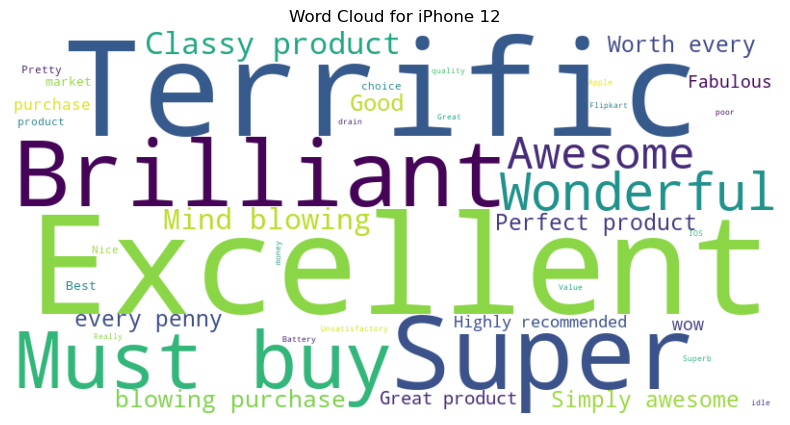

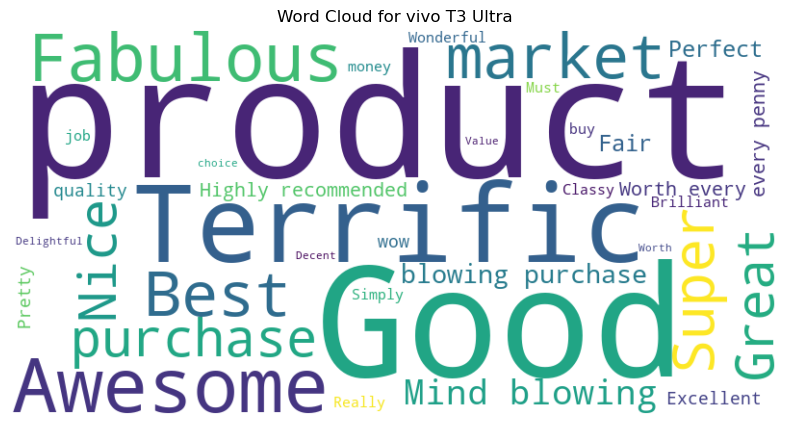

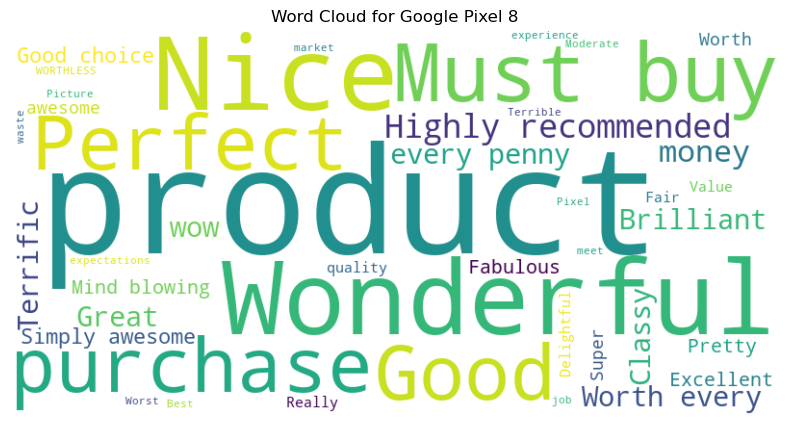

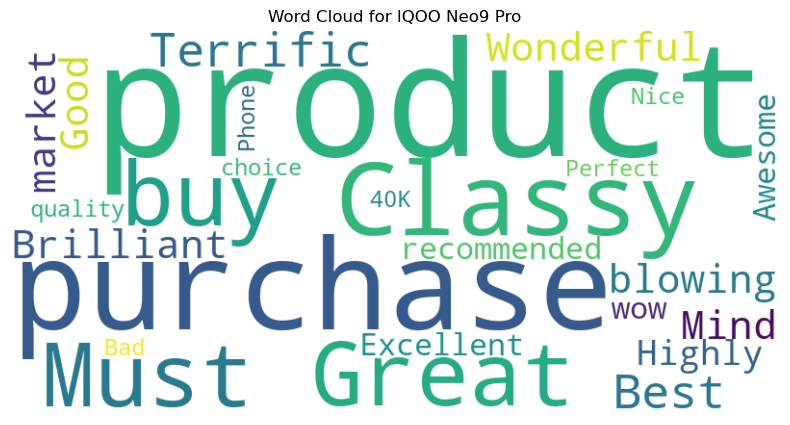

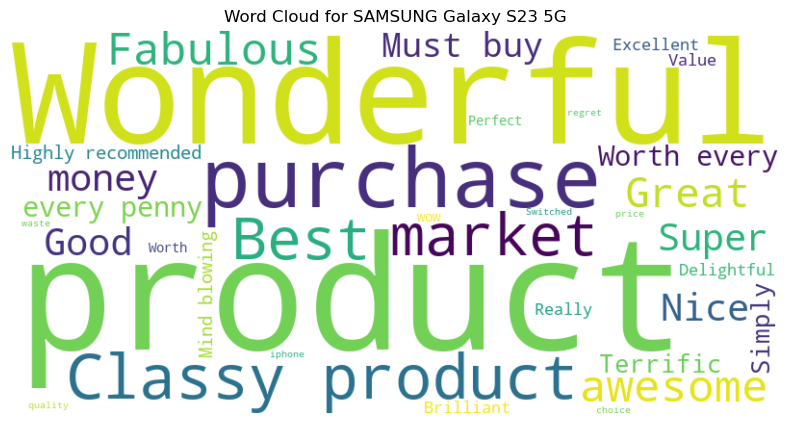

In [62]:
 # Word Cloud for Review Summaries
products = df["product_name"].unique()
for product in products:
    product_reviews = " ".join(df[df["product_name"] == product]["review_summary"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(product_reviews)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {product}")
    plt.show()

## Pie charts to show the proportion of positive, neutral, and negative sentiments for each product.

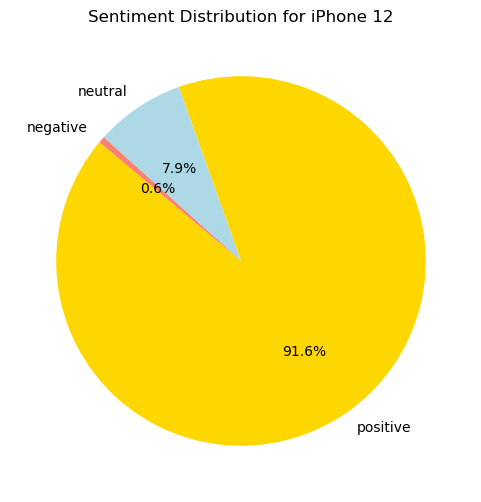

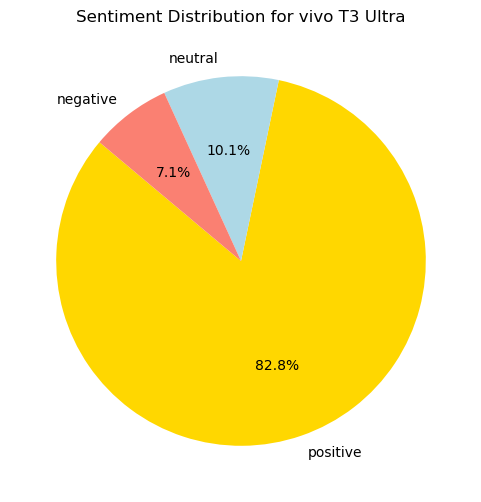

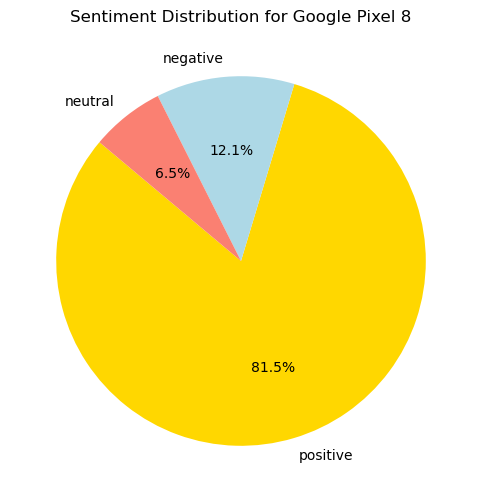

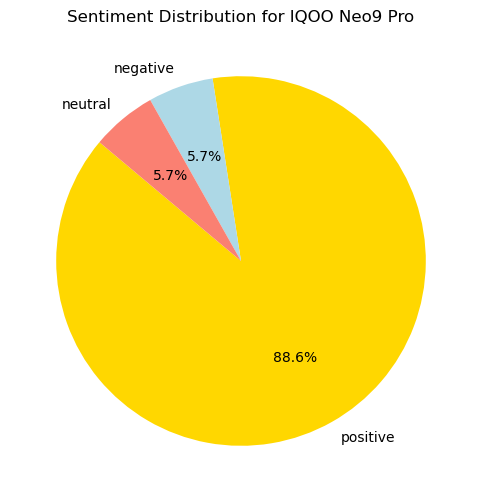

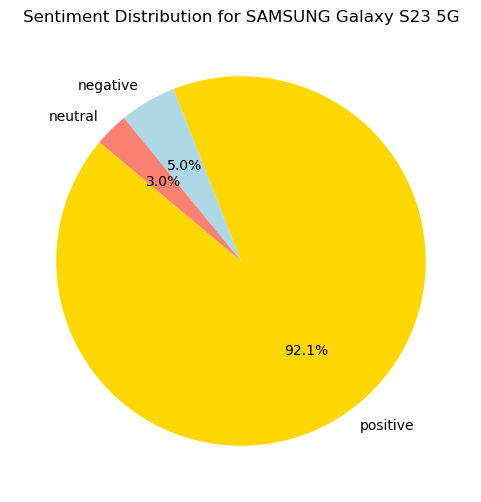

In [63]:
#Product Sentiment Pie Charts
for product in products:
    sentiment_counts = df[df["product_name"] == product]["compound_sentiment"].value_counts()
    plt.figure(figsize=(6, 6))
    sentiment_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["gold", "lightblue", "salmon"])
    plt.title(f"Sentiment Distribution for {product}")
    plt.ylabel("")  # Remove y-label for cleaner look
    plt.show()

## A boxplot to compare the price range for each product and how it correlates with user ratings

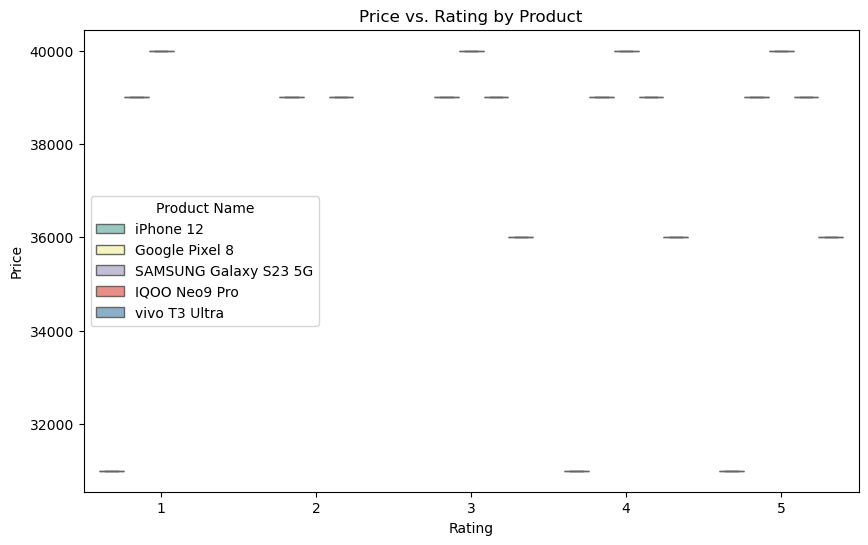

In [64]:
# 4. Price vs. Rating Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="rating", y="Price", hue="product_name", palette="Set3")
plt.title("Price vs. Rating by Product")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.legend(title="Product Name")
plt.show()

 ## A horizontal bar chart to show the number of reviews for each product.

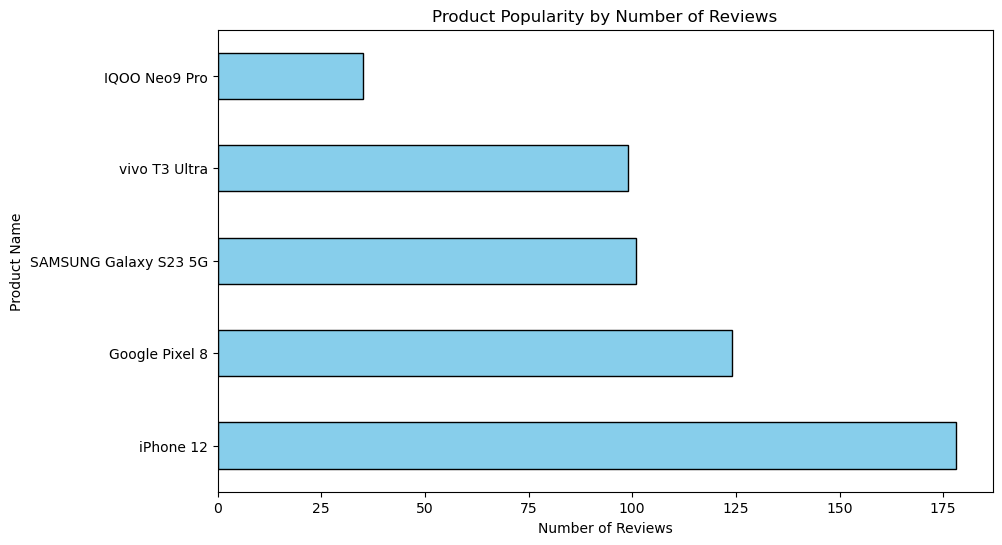

In [65]:
# 5. Product Popularity by Count of Reviews
review_counts = df["product_name"].value_counts()
plt.figure(figsize=(10, 6))
review_counts.plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Product Popularity by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.show()